# Example (Clustering Iris)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/Iris/Iris-cleaned.csv')
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
df.species = df.species.astype('category')
df.dtypes

sepal length     float64
sepal width      float64
petal length     float64
petal width      float64
species         category
dtype: object

In [4]:
#limit to 2d for visualization
attributes = df[['sepal length', 'sepal width']]
attributes.head(3)

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [5]:
km = KMeans(n_clusters=3)
km.fit(attributes)

KMeans(n_clusters=3)

In [6]:
km_labels = km.predict(attributes)
km_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [7]:
df.species.cat.codes.values #integer coded label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [10]:
colors = pd.Series(['blue','green','red'])
df['KMeans'] = colors[km_labels].values
df['species_code'] = colors[df.species.cat.codes.values].values
df.head(3)

,sepal length,sepal width,petal length,petal width,species,KMeans,species_code
0,5.1,3.5,1.4,0.2,setosa,green,blue
1,4.9,3.0,1.4,0.2,setosa,green,blue
2,4.7,3.2,1.3,0.2,setosa,green,blue


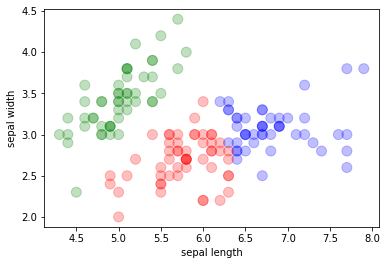

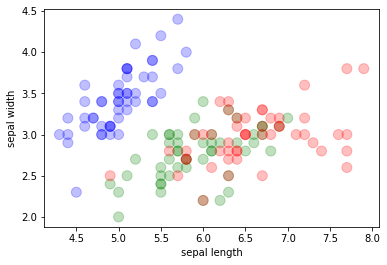

In [13]:
plot1 = df.plot.scatter(x='sepal length',y='sepal width',c=df.KMeans.values, s=100, alpha=0.25)
plot2 = df.plot.scatter(x='sepal length',y='sepal width',c=df.species_code, s=100, alpha=0.25)
#did good job for blue setosa
#red, green are overlap